# Projeto 2 - Ciência dos Dados

**Dataset:** [https://www.kaggle.com/vicsuperman/prediction-of-music-genre](https://www.kaggle.com/vicsuperman/prediction-of-music-genre)

#### Autores

- Lucas Gurgel
- Gabriela Albuquerque
- João Pedro Lima
- Pedro Fracassi

#### Professor 

- Maciel

## Índice

- [Introdução](#introducao)
- [Análise Exploratória](#analise)


## Importando as Bibliotecas 
____

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import plotly.io as pio
pio.renderers.default = 'iframe_connected'
from sklearn.model_selection import cross_val_score

# decision tree classifier sklearn
# random forest


## Diretório onde está nosso arquivo
___

In [3]:
print(f'Esperamos trabalhar no diretório {os.getcwd()}')

Esperamos trabalhar no diretório c:\Users\lucas\Downloads\Projeto_2_Cdados-1


<div id="introducao">

# Introdução

#### Pergunta a ser respondida em nosso projeto:


- Nosso Projeto 2 de Cdados será baseado em analise/previsão do gênero musical de uma determinada pessoa. Essa 'previsão' terá como parâmetros informações como 'nome do artista', 'instrumentalidade', 'energia' e entre outros. A descrição do nosso problema é baseado em uma pessoa não saber o seu estilo musical dessa maneira com a construção do nosso projeto dois, conseguiremos fazer uma previsão em qual estimo musical determinada pessoa está mais inserida.










<img src="imagens/tela1.png" alt="inicio"
	title="tela" width="1400" height="700" />
___

# Contextualização


- Atualmente, com a evolução da tecnologia tornou se possível a construção de uma comunidade baseado em seus gostos musicais a fim de criar uma maior interatividade entre as pessoas. Entretanto muitas pessoas não sabem o estilo  em que está mais inserido e com isso acaba não interagindo com pessoas que gostam dos mesmos artistas, estilos musicais. Portanto, o objetivo desse projeto é classificar/prever  o gênero musical de uma determinada pessoa. Sendo que essa  'previsão' terá como parâmetros informações como 'nome do artista', 'instrumentalidade', 'energia' e entre outros para que seja possível a realização da classificação/previsão.
___

## Entendendo as features

- **`artist_name`** - Nome do artista.
- **`track_name`** - Nome da música.
- **`popularity`** - Popularidade da música.
- **`acousticness`** - Acústica da música, Uma medida de confiança de 0,0 a 1,0 para saber se a faixa é acústica.
- **`danceability`** - Descreve como uma faixa é adequada para dançar com base em uma combinação de elementos musicais, incluindo andamento, estabilidade do ritmo, intensidade da batida e regularidade geral.
- **`duration_ms`** - Duração da música em milissegundos.
- **`energy`** - Representa a intensidade e atividade, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, death metal tem alta energia, enquanto um prelúdio de Bach tem pontuação baixa na escala.
- **`instrumentalness`** - Prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou palavra falada são claramente “vocais”.
- **`key`** - A chave geral estimada da pista. Os inteiros mapeiam para arremessos usando a notação de classe de arremesso padrão. Por exemplo. 0 = C, 1 = C♯ / D ♭, 2 = D e assim por diante.
- **`liveness`** - Detecta a presença de um público na gravação. Valores de vivacidade mais altos representam um aumento na probabilidade de a trilha ter sido executada ao vivo.
- **`loudness`** - O volume geral de uma faixa em decibéis (dB). Os valores de sonoridade são calculados em toda a trilha e são úteis para comparar a sonoridade relativa das trilhas.
- **`mode`** -Indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0
- **`speechiness`** - Isso detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada for a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 será o valor do atributo.
- **`tempo`** - O tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, o tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média do tempo.
- **`valence`** - Descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórico), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimido, com raiva).
- **`music_genre`** - Genero musical da música, como pop, rock, funk, etc. **(Target)**


## Abrindo o banco de dados 
___

- Realização das primeiras limpezas em nosso banco de dados 

In [4]:

df = pd.read_csv('music_genre.csv').drop(['obtained_date'], axis=1) 

df.drop(['artist_name', 'track_name', 'instance_id'], axis=1, inplace=True)
df = df[df.tempo != '?'] # Por algum motivo tinham algumas linhas com uma "?" no lugar do tempo

df.dropna(inplace=True)

df['key'] = df['key'].astype('category')
df['mode'] = df['mode'].astype('category')
df['tempo'] = df['tempo'].astype('float')
df = df[df.duration_ms > 0]


df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
1,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
6,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.106,-4.294,Major,0.3510,149.995,0.230,Electronic


Através do `.value_counts` executado abaixo, é possível perceber que o dataset é perfeitamente balanceado entre os diferentes gêneros musicais, com 5 mil linhas de cada um.

In [5]:
df['music_genre'].value_counts().to_frame()

,music_genre
Rock,4099
Hip-Hop,4077
Anime,4064
Jazz,4064
Alternative,4051
Country,4049
Blues,4046
Rap,4042
Classical,4036
Electronic,4032



<div id="analise">

## Análise Exploratória dos Dados
___

Na análise exploratória, nosso objetivo é descobrir quais variáveis são significantes para a predição, para isso usamos o boxplot para visualizar os dados e com isso tirar conclusoes sobre quais variáveis são importantes para a predição, e quais não são.
- Primeiro vamos explicar como o boxplot é utilizado para visualizar os dados, O gráfico de box-plot foi criado pelo estatístico John Tukey há quase 50 anos, e é usado até hoje nos dando uma clareza da distribuição dos dados numéricos, resumidos em cinco números: mínimo, primeiro quartil, mediana, terceiro quartil, e máximo. Esses valores são calculados ordenando primeiramente a amostra do menor para o maior. ~É uma ferramenta gráfica que permite visualizar a distribuição e valores discrepantes (outliers) dos dados, fornecendo assim um meio complementar para desenvolver uma perspectiva sobre o caráter dos dados. Além disso, o boxplot também é uma disposição gráfica comparativa. Observe a figura do boxplot. Note que o local onde a haste vertical começa (de baixo para cima) indica o mínimo (excetuando algum possível valor extremo ou outlier) e, onde a haste termina indica o máximo (também excetuando algum possível outlier).

<img src="imagens/boxplot.png" alt="inicio"
	title="tela" width="1000" height="700" />
















- O retângulo no meio dessa haste possui três linhas horizontais: a linha de baixo, que é o próprio contorno externo inferior do retângulo, indica o primeiro quartil. A de cima, que também é o próprio contorno externo superior do retângulo, indica o terceiro quartil. A linha interna indica o segundo quartil ou mediana,os asteriscos ou pontos que ás vezes aparecem no boxplot indicam que aquelas observações são atípicas, valores discrepantes, extremos ou outliers.
## **Como interpretar o boxplot?**
O boxplot nos fornece uma análise visual da posição, dispersão, simetria, caudas e valores discrepantes (outliers) do conjunto de dados.
 - **Posição** – Em relação à posição dos dados, observa-se a linha central do retângulo (a mediana ou segundo quartil).
 - **Dispersão** – A dispersão dos dados pode ser representada pelo intervalo interquartílico que é a diferença entre o terceiro quartil e o primeiro quartil (tamanho da caixa), ou ainda pela amplitude que é calculada da seguinte maneira: valor máximo – valor mínimo. Embora a amplitude seja de fácil entendimento, o intervalo interquartílico é uma estatística mais robusta para medir variabilidade uma vez que não sofre influência de outliers.
 - **Simetria** – Um conjunto de dados que tem uma distribuição simétrica, terá a linha da mediana no centro do retângulo. Quando a linha da mediana está próxima ao primeiro quartil, os dados são assimétricos positivos e quando a posição da linha da mediana é próxima ao terceiro quartil, os dados são assimétricos negativos. Vale ressaltar que a mediana é a medida de tendência central mais indicada quando os dados possuem distribuição assimétrica, uma vez que a média aritmética é influenciada pelos valores extremos.
 - **Caudas** – As linhas que vão do retângulo até aos outliers podem fornecer o comprimento das caudas da distribuição.
 - **Outliers** – Já os outliers indicam possíveis valores discrepantes. No boxplot, as observações são consideradas outliers quando estão abaixo ou acima do limite de detecção de outliers.

 
O limite de detecção de outliers é construído utilizando o intervalo interquartílico, dado pela distância entre o primeiro e o terceiro quartil. Sendo assim, os limites inferior e superior de detecção de outlier são dados por:
 - Limite Inferior = Primeiro Quartil – 1,5 * (Terceiro Quartil – Primeiro Quartil)
 - Limite Superior = Terceiro Quartil + 1,5 * (Terceiro Quartil – Primeiro Quartil)

## Antes de começar a análise, criamos uma função auxiliar para plotar histogramas daquela feature em cada gênero musical.

In [6]:

# TODO: Limitar Y

generos = df['music_genre'].unique()

def histogramas(feature):
  faixa = np.arange(df[feature].min(), df[feature].max(), df[feature].max()/20)

  # Dry run pra descobrir o Y máximo
  maxY = 0
  for (i, genero) in enumerate(generos):
    plt.figure(1)
    gen = df[df['music_genre'] == genero]
    if gen.shape[0] == 0:
          continue
    y, x, _ = plt.hist(gen[feature], bins=faixa,color='cyan', density=True, label=feature)
    if y.max() > maxY:
      maxY = y.max()
    plt.close(1)

  plt.figure(figsize=(20,10))
  for (i, genero) in enumerate(generos):
    gen = df[df['music_genre'] == genero]
    if gen.shape[0] == 0:
      continue
    plt.subplot(2, int(np.ceil(len(generos)/2)), i+1)
    plt.ylim((0, maxY+maxY/20))
    y, x, _ = plt.hist(gen[feature], bins=faixa,color='cyan', density=True, label=feature)
    plt.xlabel(feature)
    plt.ylabel('Frequência')
    plt.title(genero)

### `popularity` x `music_genre`

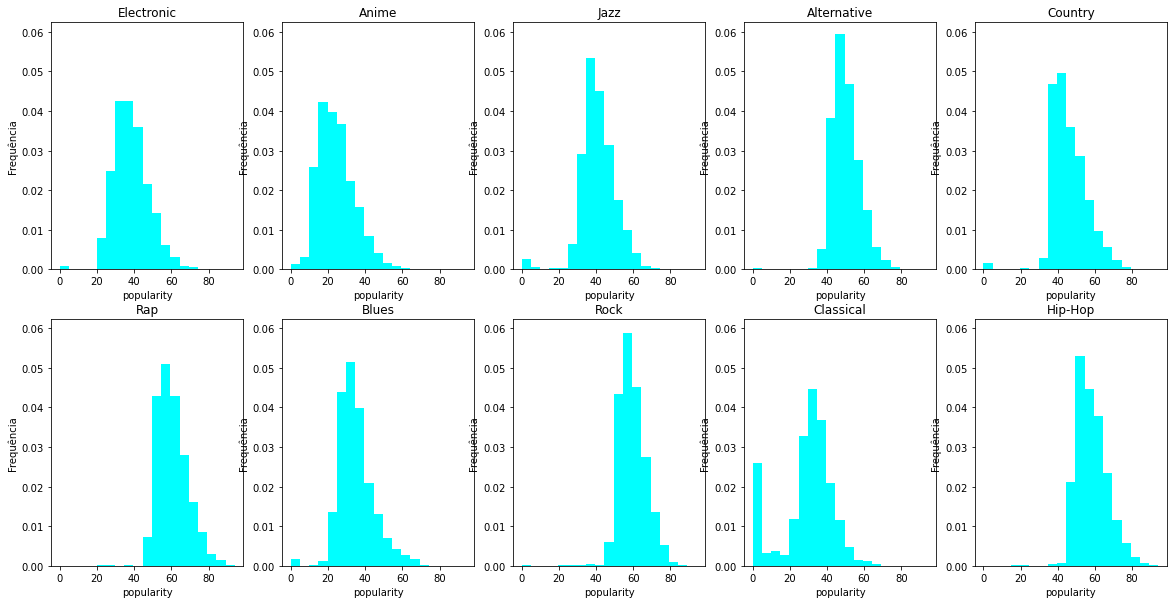

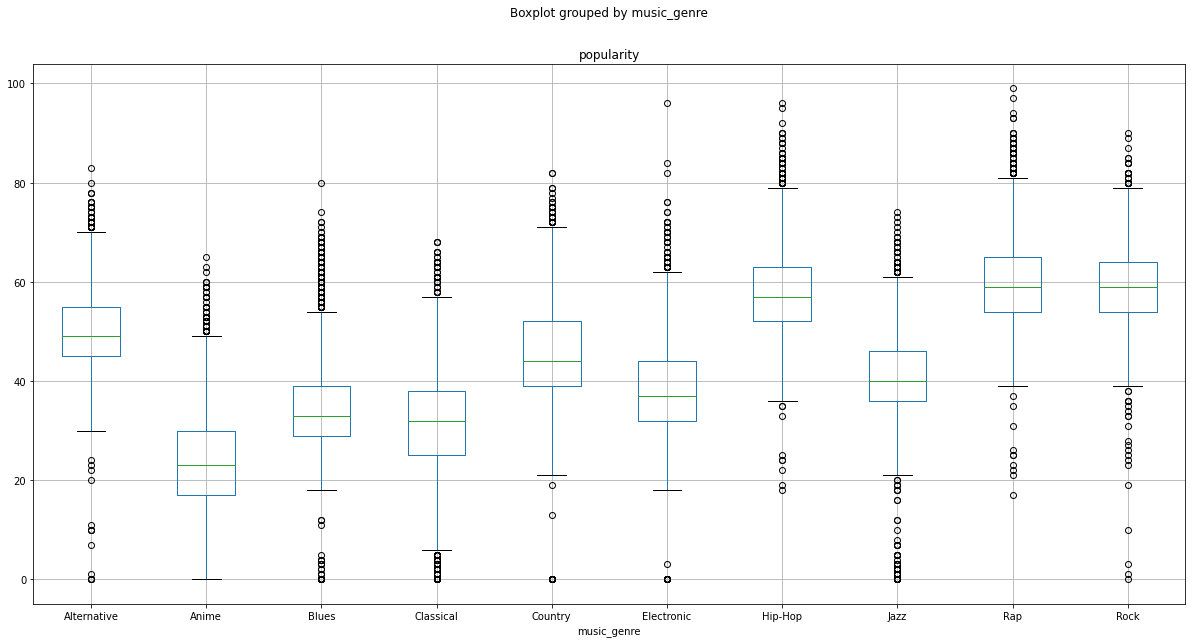

In [7]:
feature = 'popularity'
histogramas(feature);
df.boxplot(column=feature, by='music_genre',figsize=(20,10));

### Explicação do Gráfico

- Boxplot: Em relação a popularidade no eixo y e os gêneros musicais no eixo x, percebemos uma relação 'fora da curva' para todos os gêneros musicas representados em nosso gráfico. Por isso em relação ao implementar os nossos três modelos teremos uma certa anomalia nos resultados esperados. Com isso concluímos que em relação ao banco de dados nesse aspecto ele está muito limitado e para bons resultados era necessário de algo bem abrangente.
___


### `acousticness` x `music_genre`

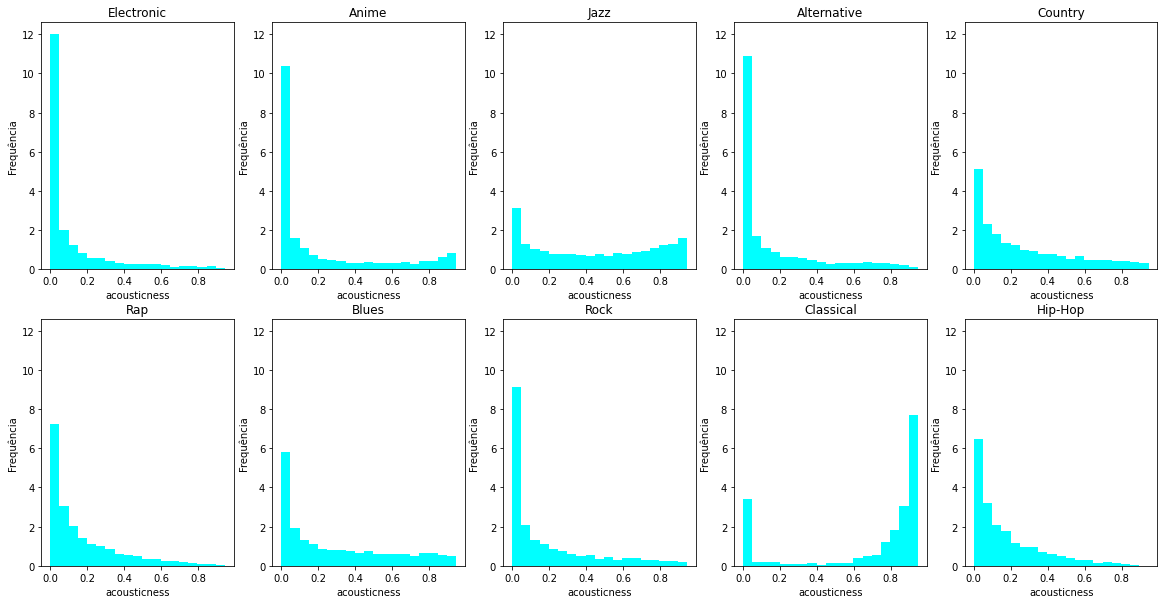

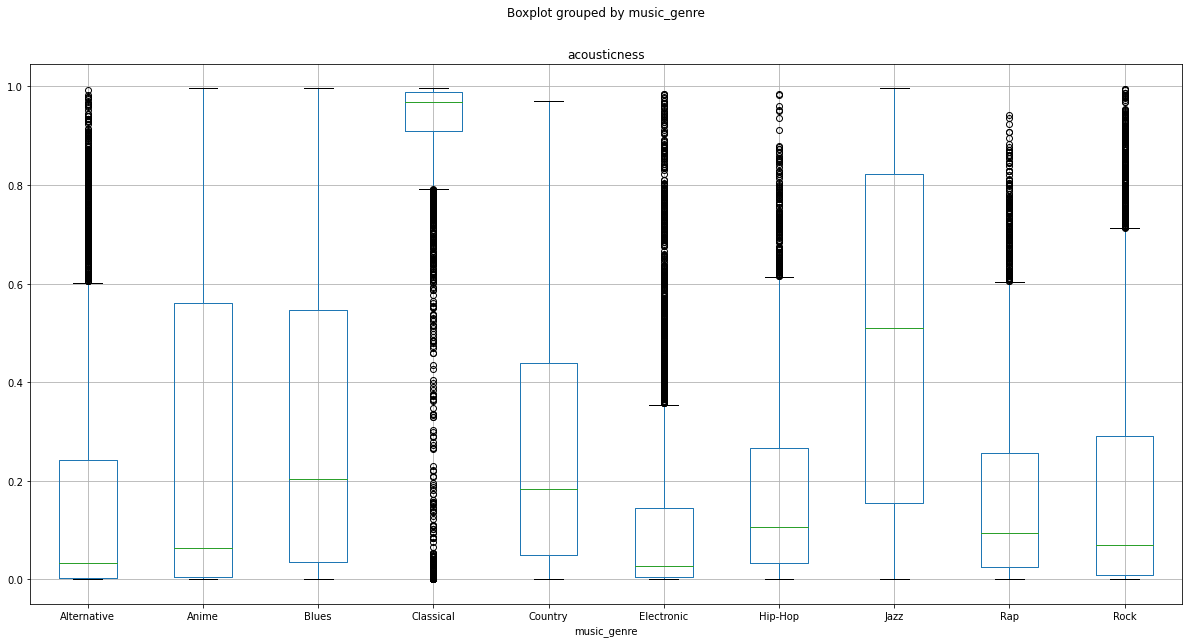

In [8]:
feature = 'acousticness'
histogramas(feature);
df.boxplot(column=feature, by='music_genre',figsize=(20,10));

### Explicação do Gráfico


- Boxplot: Em relação a acústica da música  no eixo y e os gêneros musicais no eixo x, percebemos uma relação 'fora da curva' para alguns gêneros musicas como 'clássico','eletrônica', 'rock','hip-hop','rap' e por fim 'alternativo' . Por isso em relação ao implementar os nossos três modelos teremos uma certa anomalia nos resultados esperados. Com isso concluímos que em relação ao banco de dados nesse aspecto ele está muito limitado e para bons resultados era necessário de algo bem abrangente.
___

### `danceability` x `music_genre`

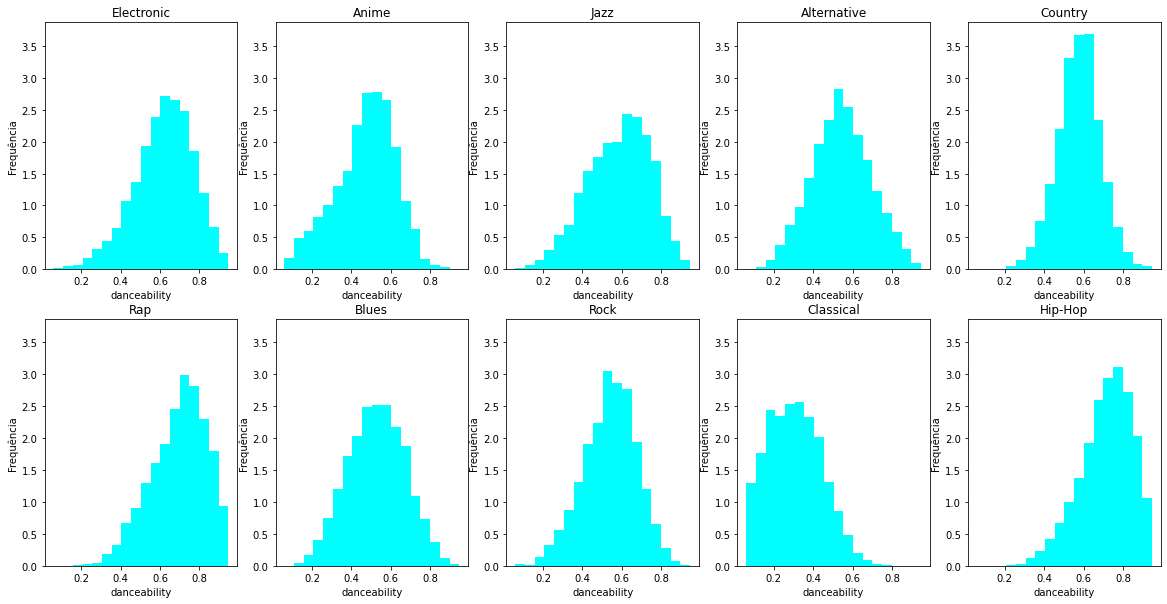

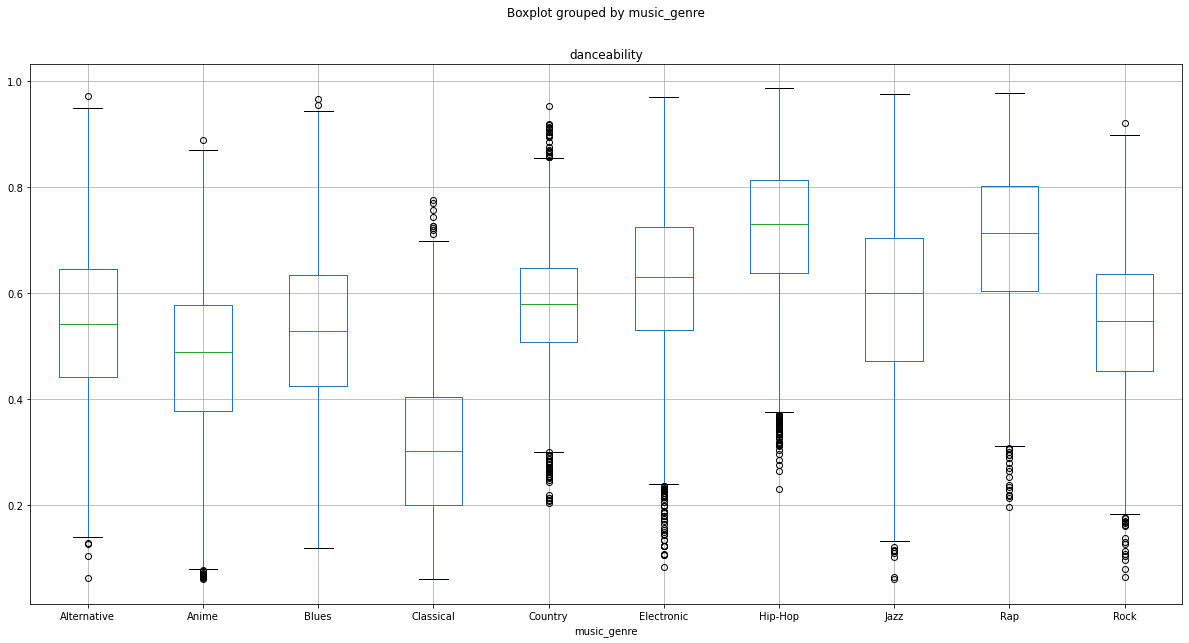

In [9]:
feature = 'danceability'
histogramas(feature);
df.boxplot(column=feature, by='music_genre',figsize=(20,10));

### Explicação do Gráfico

-  Boxplot: Em relação a 'danceability' da música  no eixo y e os gêneros musicais no eixo x, percebemos uma relação de 'fora da curva' pequena para alguns gêneros, isso pode atrapalhar na hora de concluirmos sobre alguma probabilidade. Por isso em relação ao implementar os nossos três modelos teremos uma certa anomalia nos resultados esperados. Com isso concluímos que em relação ao banco de dados nesse aspecto ele está muito limitado e para bons resultados era necessário de algo bem abrangente.
___ 

### `duration(ms)` x `music_genre`

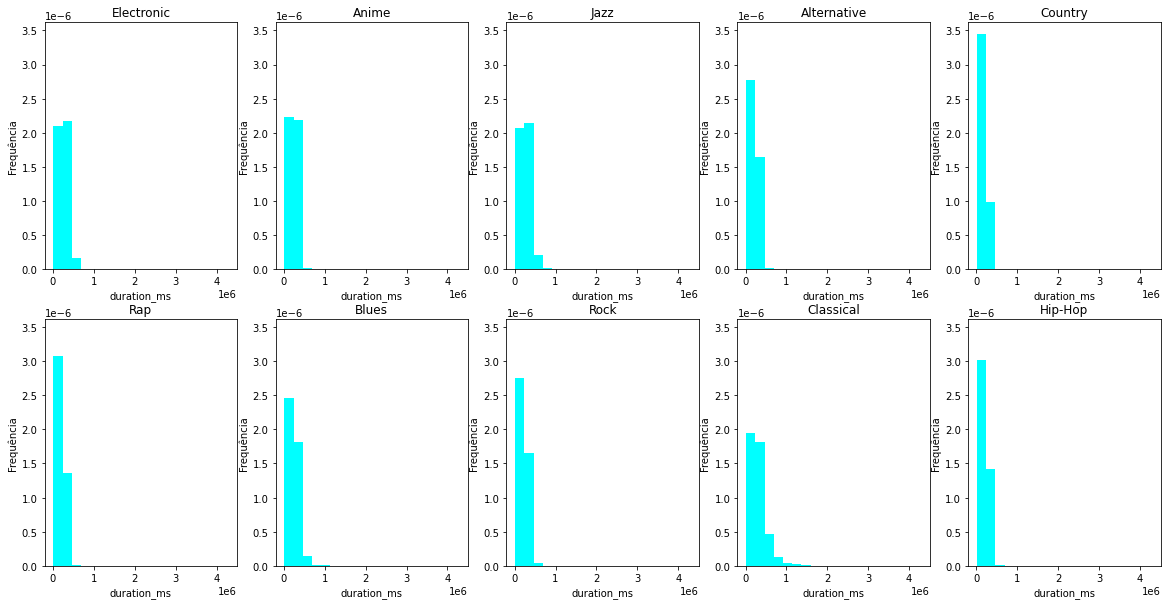

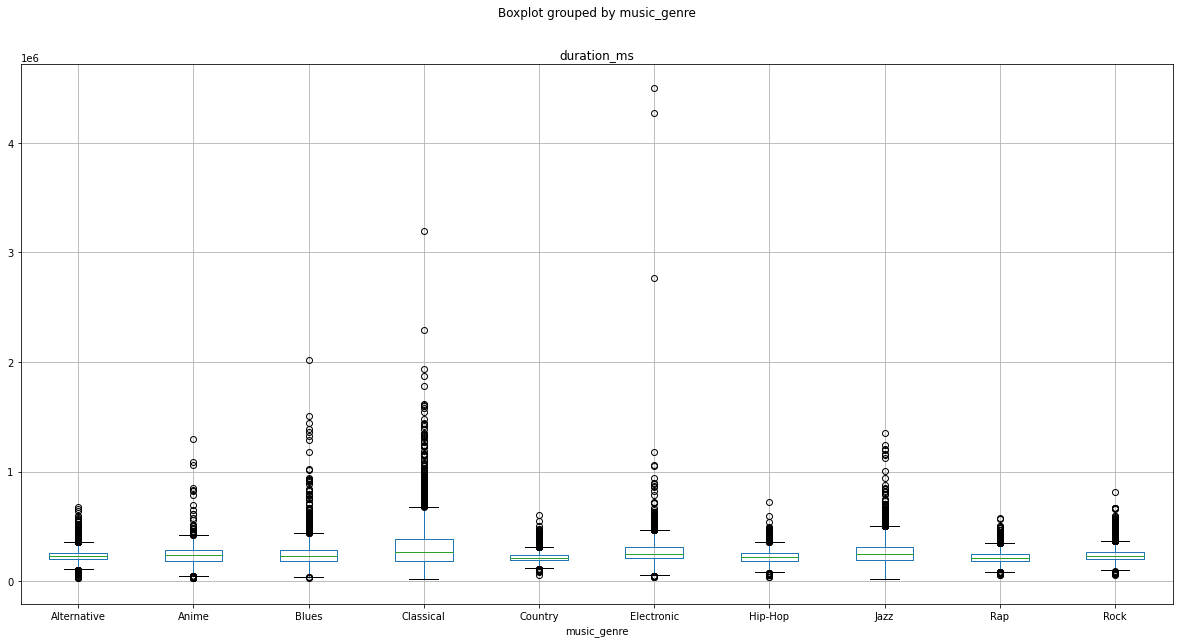

In [10]:
feature = 'duration_ms'
histogramas(feature);
df.boxplot(column=feature, by='music_genre',figsize=(20,10));

### Explicação do Gráfico

- Boxplot: Em relação a 'duration' da música  no eixo y e os gêneros musicais no eixo x, percebemos uma relação de 'fora da curva' pequena para todos os gêneros, isso pode atrapalhar na hora de concluirmos sobre alguma probabilidade. Por isso em relação ao implementar os nossos três modelos teremos uma certa anomalia nos resultados esperados. Com isso concluímos que em relação ao banco de dados nesse aspecto ele está muito limitado e para bons resultados era necessário de algo bem abrangente.
____

### `energy` x `music_genre`

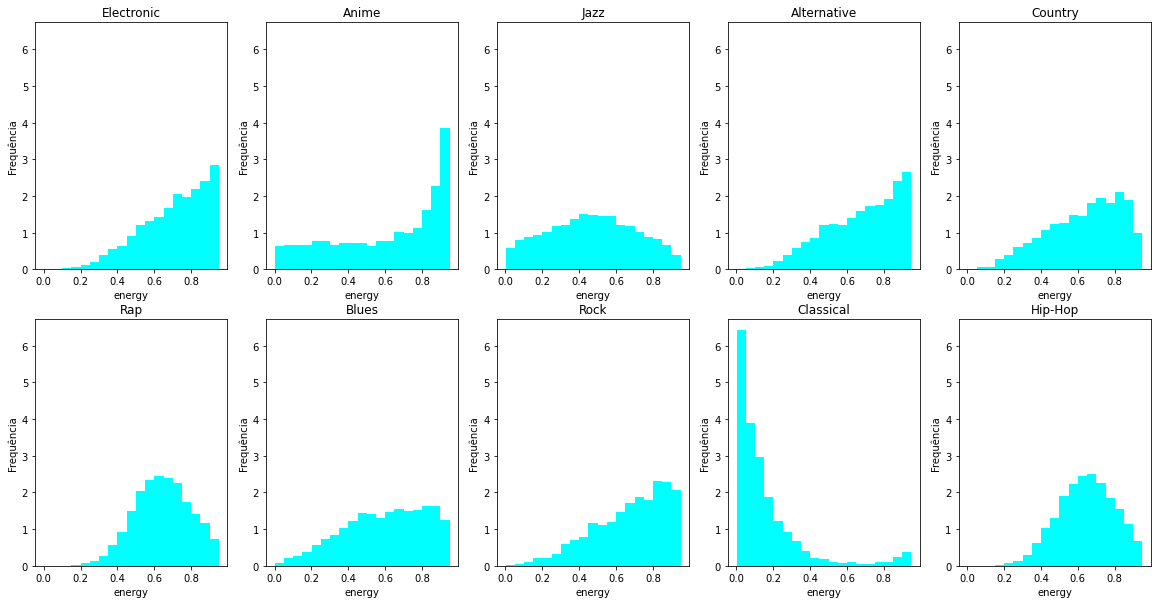

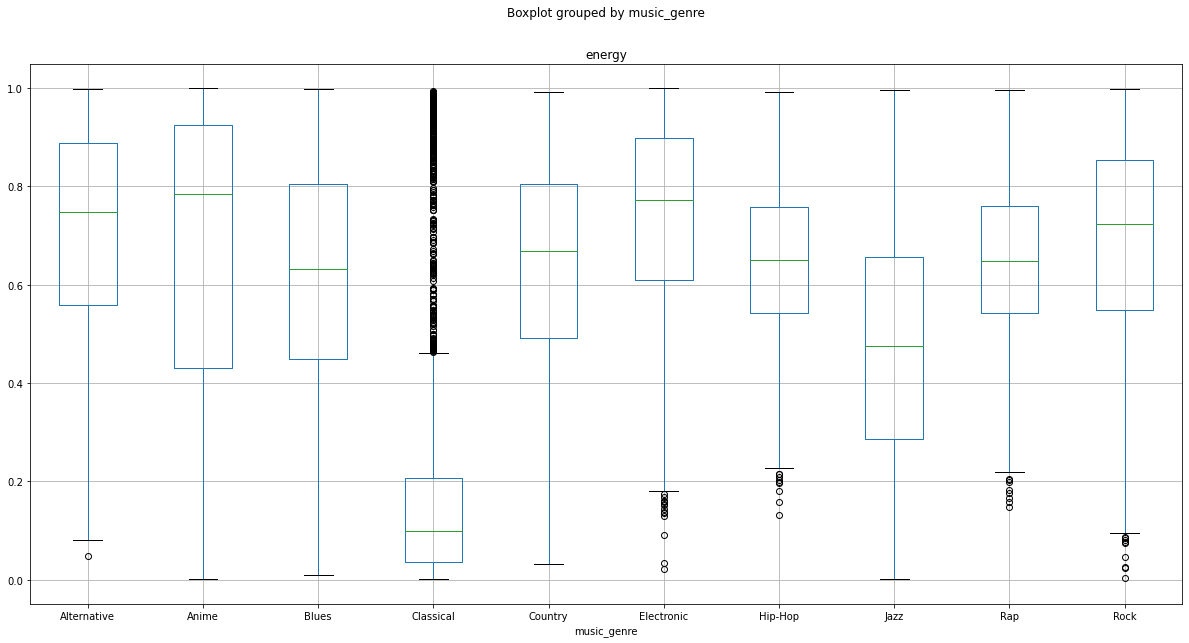

In [11]:
feature = 'energy'
histogramas(feature);
df.boxplot(column=feature, by='music_genre',figsize=(20,10));

### Explicação do Gráfico

- Boxplot: Em relação a 'energy' da música  no eixo y e os gêneros musicais no eixo x, percebemos uma relação de 'fora da curva' especialmente para o 'classical', isso pode atrapalhar na hora de concluirmos sobre alguma probabilidade. Por isso em relação ao implementar os nossos três modelos teremos uma certa anomalia nos resultados esperados. Com isso concluímos que em relação ao banco de dados nesse aspecto ele está muito limitado e para bons resultados era necessário de algo bem abrangente.
___

### `instrumentalness` x `music_genre`

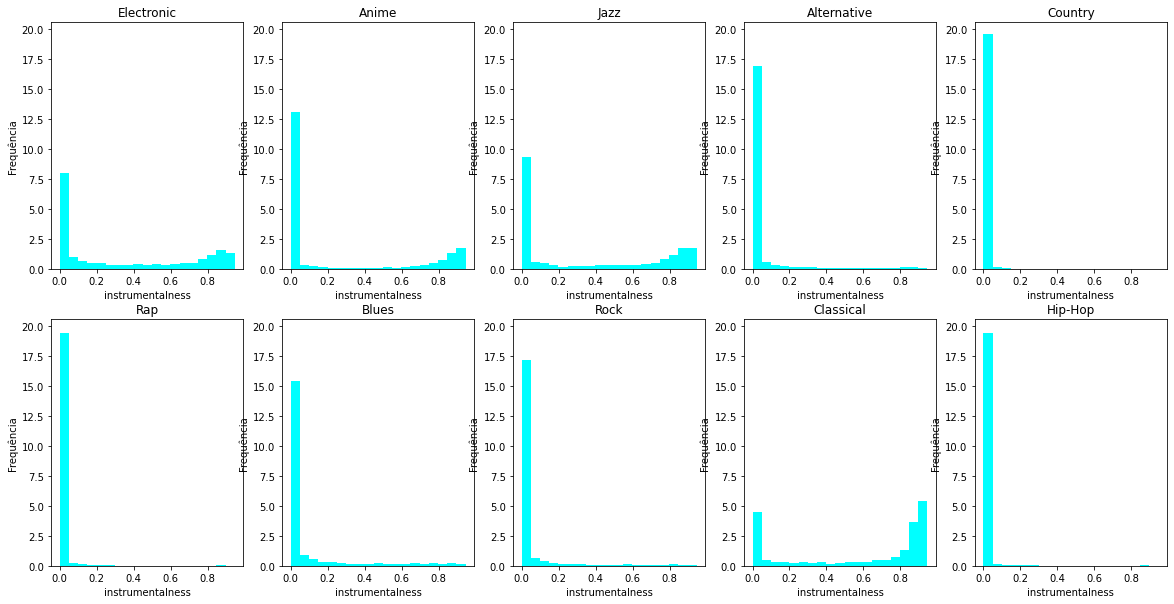

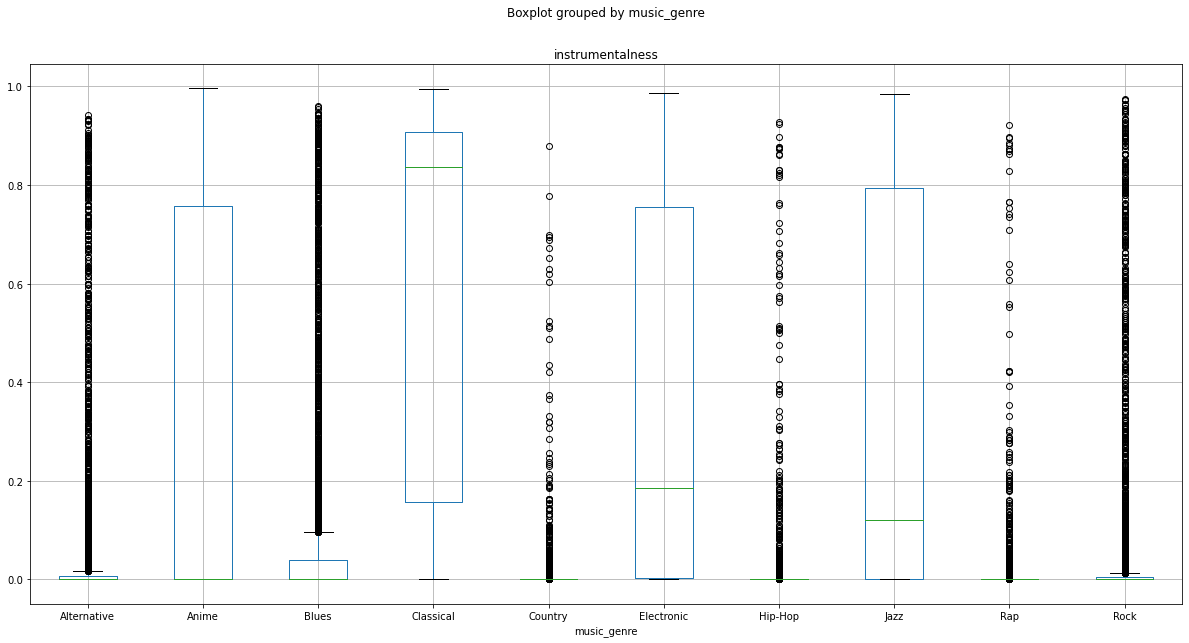

In [12]:
feature = 'instrumentalness'
histogramas(feature);
df.boxplot(column=feature, by='music_genre',figsize=(20,10));

### Explicação do Gráfico

- Boxplot: Em relação a 'instrumentalness' da música  no eixo y e os gêneros musicais no eixo x, percebemos uma relação de 'fora da curva' para alguns gêneros que possuem densidade muito baixa, tal fato torna nossa feature escassa, visto que não podemos concluir qual gênero é o mais provável. Por isso em relação ao implementar os nossos três modelos teremos uma certa anomalia nos resultados esperados. Com isso concluímos que em relação ao banco de dados nesse aspecto ele está muito limitado e para bons resultados era necessário de algo bem abrangente.
___

### `liveness` x `music_genre`

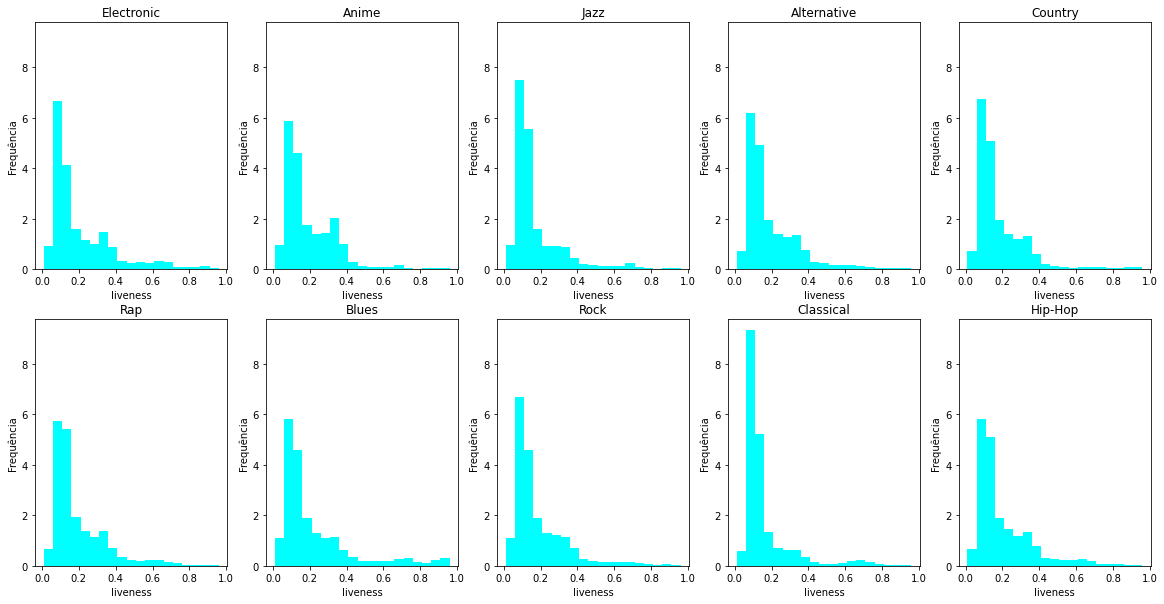

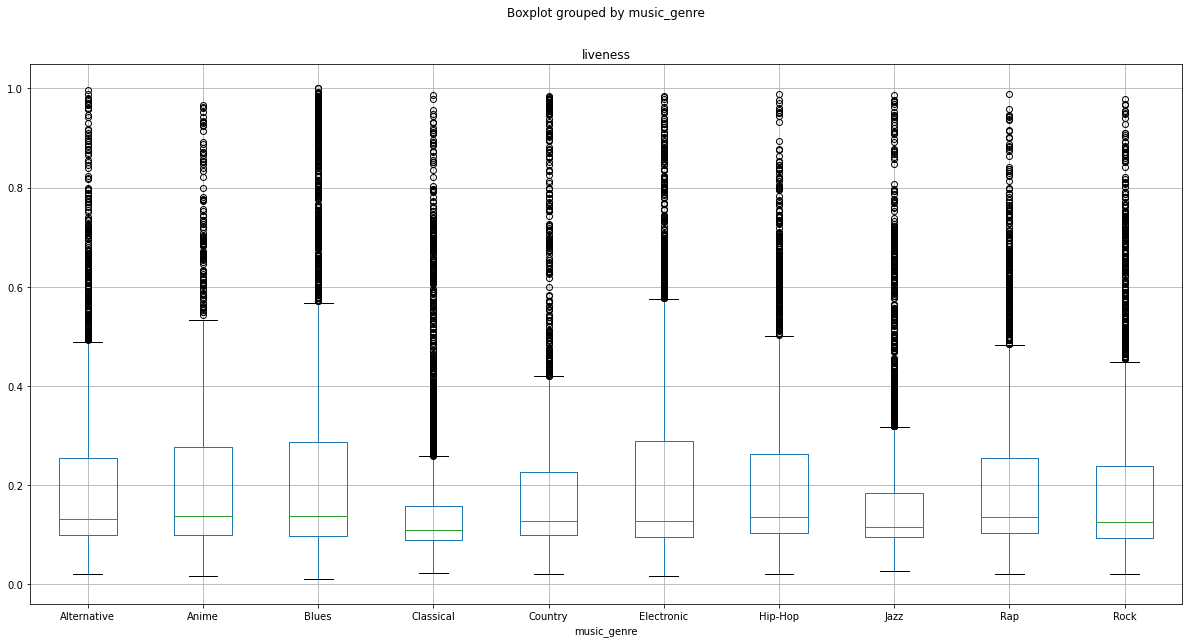

In [13]:
feature = 'liveness'
histogramas(feature);
df.boxplot(column=feature, by='music_genre',figsize=(20,10));

### Explicação do Gráfico

- Boxplot: Em relação a 'liveness' da música  no eixo y e os gêneros musicais no eixo x, percebemos uma relação de 'fora da curva' para todos os gêneros, tal fato torna nossa feature escassa, visto que não podemos concluir qual gênero é o mais provável. Por isso em relação ao implementar os nossos três modelos teremos uma certa anomalia nos resultados esperados. Com isso concluímos que em relação ao banco de dados nesse aspecto ele está muito limitado e para bons resultados era necessário de algo bem abrangente.
___

### `loudness` x `music_genre`

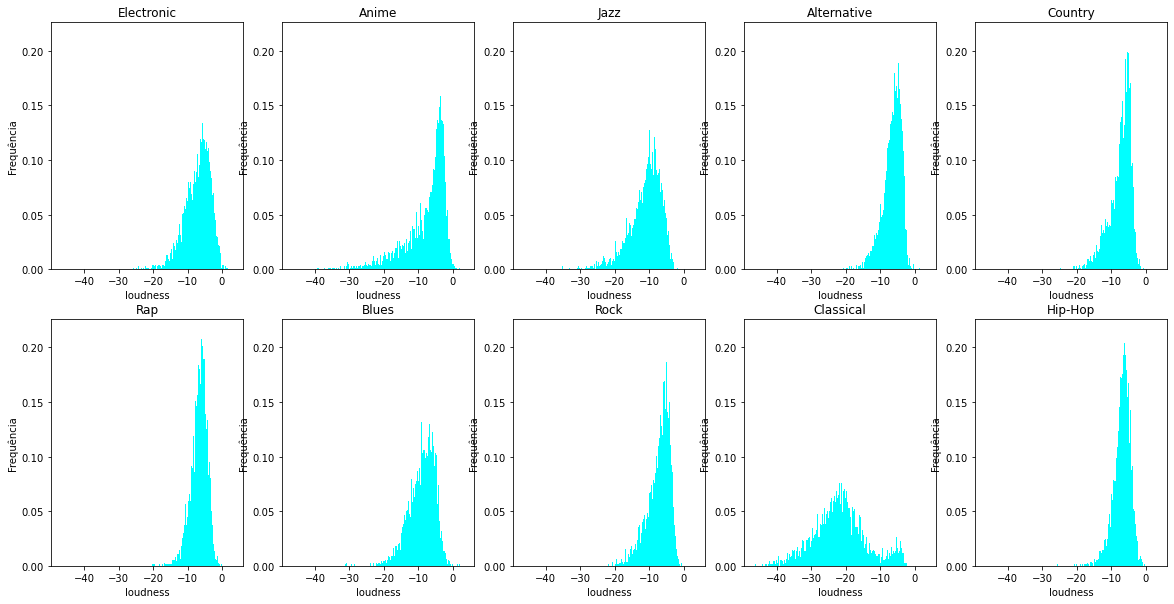

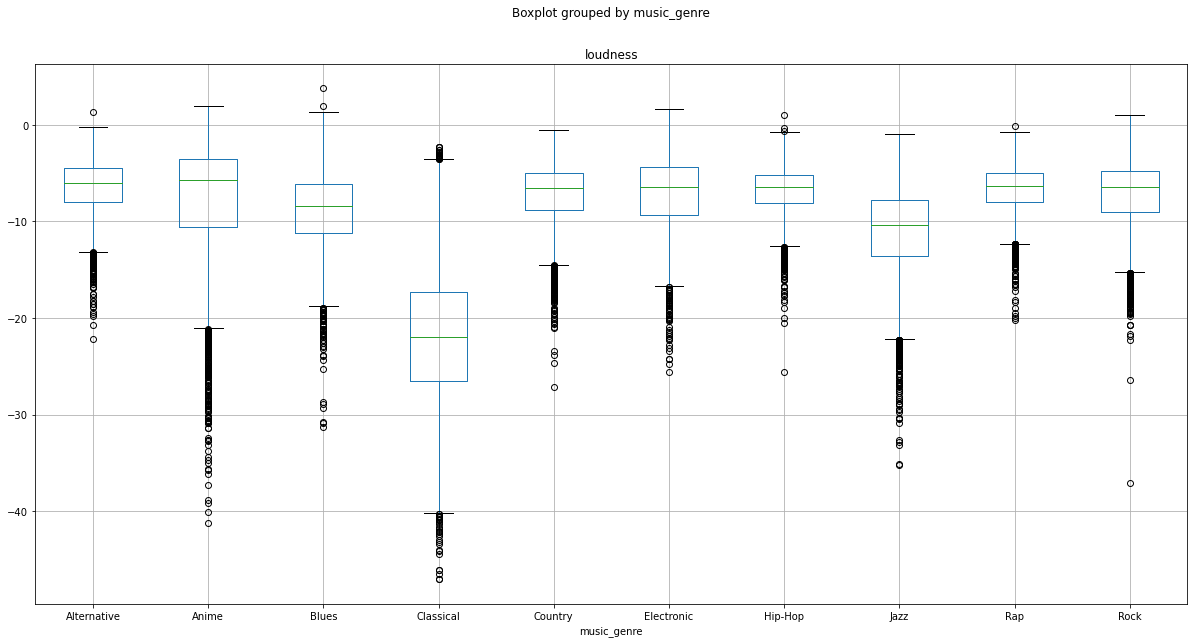

In [14]:
feature = 'loudness'
histogramas(feature);
df.boxplot(column=feature, by='music_genre',figsize=(20,10));

### Explicação do Gráfico

- Boxplot: Em relação a 'loudness' da música  no eixo y e os gêneros musicais no eixo x, percebemos uma relação pequena de 'fora da curva' para todos os gêneros, mas mesmo sendo pequena, tal fato ainda pode comprometer a análise . Por isso em relação ao implementar os nossos três modelos teremos uma certa anomalia nos resultados esperados. Com isso concluímos que em relação ao banco de dados nesse aspecto ele está muito limitado e para bons resultados era necessário de algo bem abrangente.
___

### `speechiness` x `music_genre`

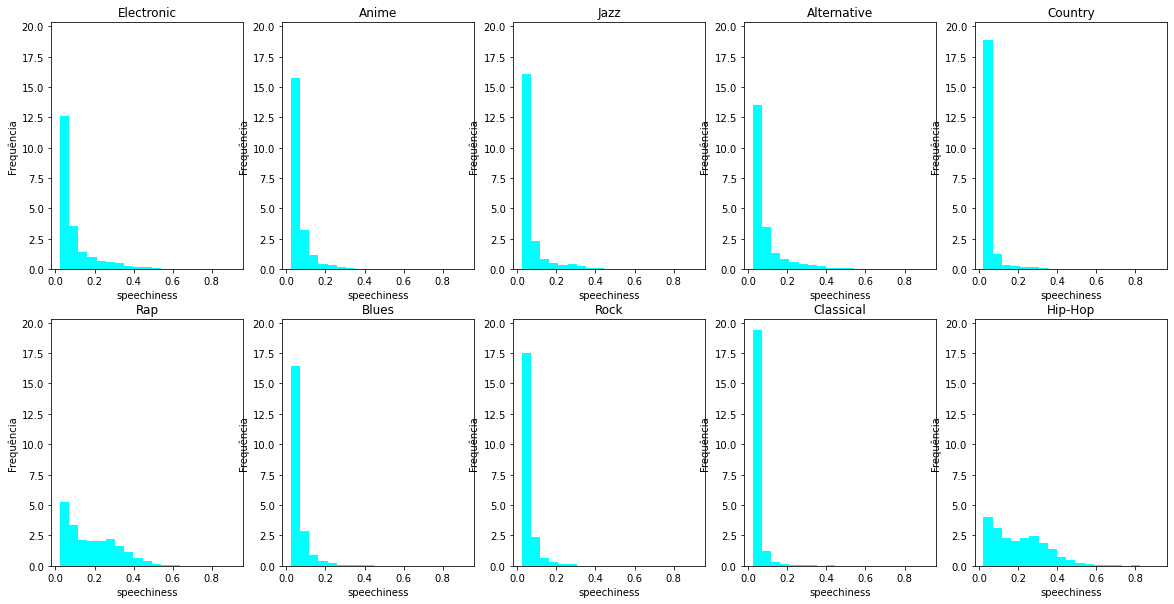

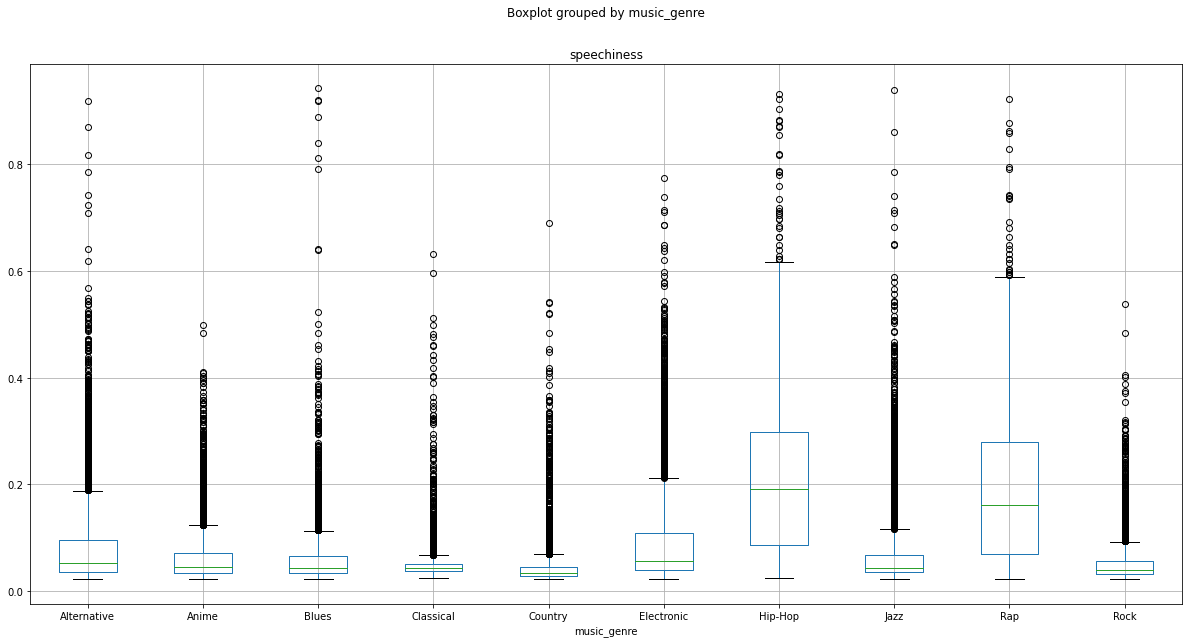

In [15]:
feature = 'speechiness'
histogramas(feature);
df.boxplot(column=feature, by='music_genre', figsize=(20,10));

### Explicação do Gráfico

- Boxplot: Em relação a 'speechiness' da música  no eixo y e os gêneros musicais no eixo x, percebemos uma relação 'fora da curva' para todos os gêneros, logo . Por isso em relação ao implementar os nossos três modelos teremos uma certa anomalia nos resultados esperados. Com isso concluímos que em relação ao banco de dados nesse aspecto ele está muito limitado e para bons resultados era necessário de algo bem abrangente.
___

### `valence` x `music_genre`

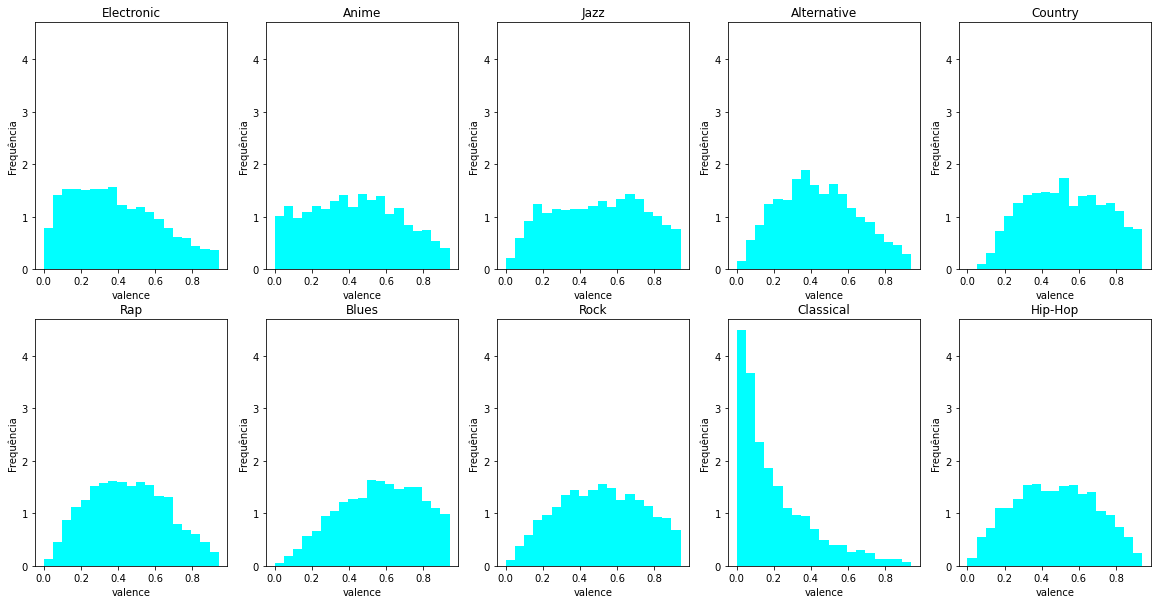

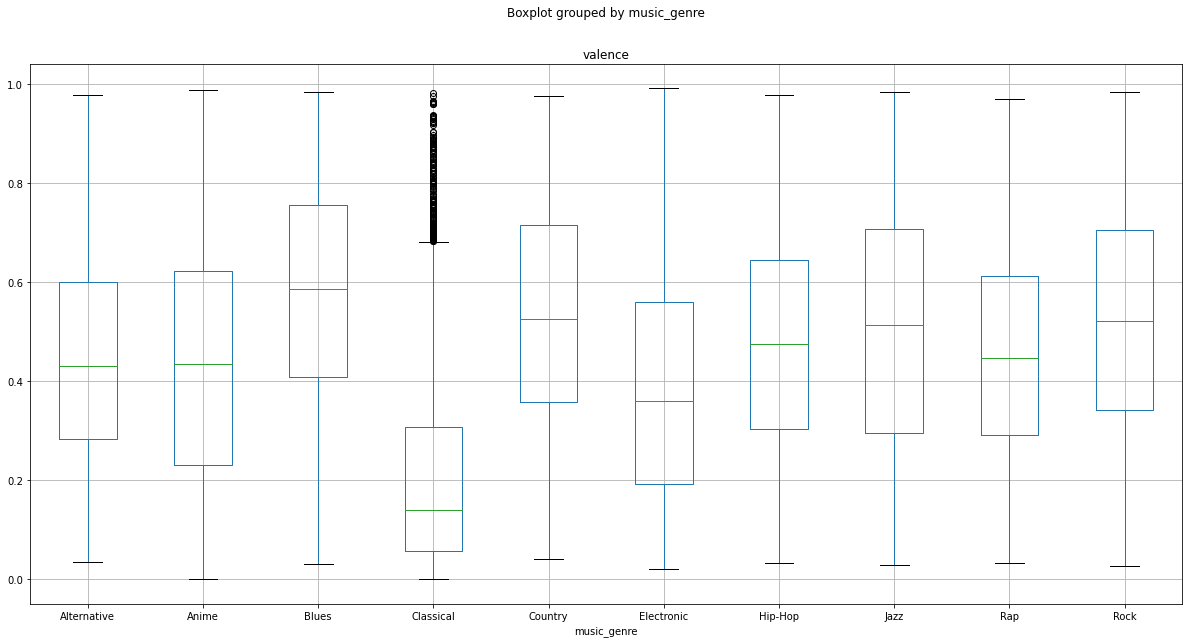

In [16]:
feature = 'valence'
histogramas(feature);
df.boxplot(column=feature, by='music_genre', figsize=(20,10));

### Explicação do Gráfico

- Boxplot: Em relação a 'valence' da música  no eixo y e os gêneros musicais no eixo x, percebemos uma relação 'fora da curva' especialmente para o 'classical'. Por isso em relação ao implementar os nossos três modelos teremos uma certa anomalia nos resultados esperados. Com isso concluímos que em relação ao banco de dados nesse aspecto ele está muito limitado e para bons resultados era necessário de algo bem abrangente.
___

# Mapa de calor para observar as correlações das variáveis 

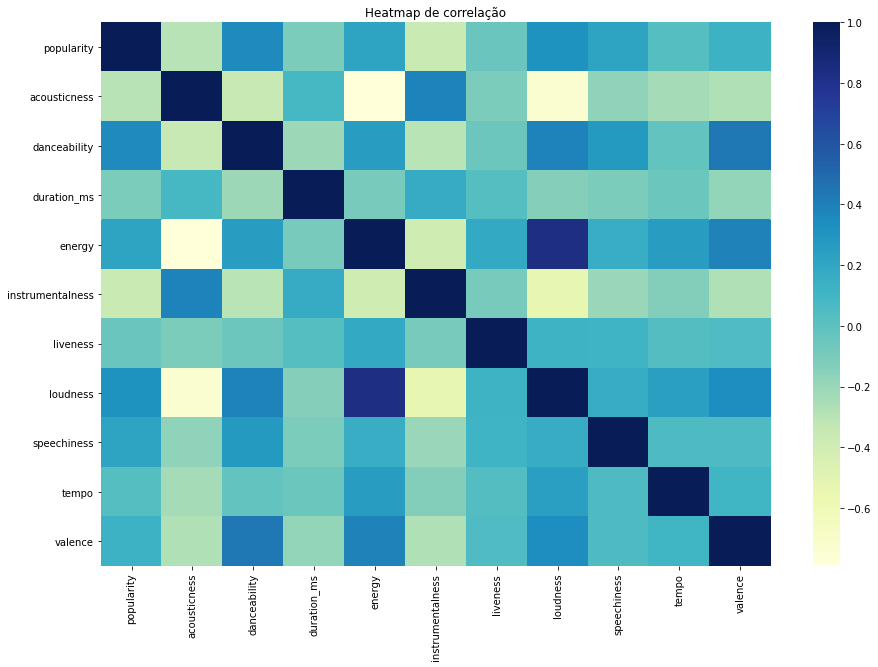

In [17]:
plt.figure(figsize = (15,10))
sn.heatmap(df.corr(), cmap="YlGnBu")
plt.title('Heatmap de correlação')
plt.show()

### Explicação do Mapa de Calor 

O Mapa de calor é um gráfico de dispersão de dados, onde os dados são representados por cores, que são aplicadas de acordo com a correlação entre as variáveis. A correlação entre duas variáveis é calculada pela fórmula:
- Correlação = (Número de valores coincidentes) / (Número de valores da primeira variável)
- A correlação entre duas variáveis é um valor entre -1 e 1, onde -1 significa que as duas variáveis são totalmente independentes e 1 significa que as duas variáveis são totalmente dependentes.
Como podemos ver os quadrados que estão na diagonal principal apresentam valores de correlação iguais a 1, ou seja, as duas variáveis são totalmente dependentes. Os quadrados que não estão na diagonal principal apresentam valores de correlação entre -1 e 1, onde -1 significa que as duas variáveis são totalmente independentes e vai crescendo de até 1, assim podemos analisar a correlação entre as variáveis.
Um exemplo de mapa de calor para as variáveis `acousticness` e `valence` apresenta uma cor mais fraca que se aproxima de valores negativos, no caso cerca de -0.5, mostrando no caso que são idependentes.
___

##  Conclusão após a Análise Exploratória 



Com tudo, podemos notar que praticamente todos os gráficos/boxplots mostram uma relação de 'fora da curva' para alguns gêneros, e as vezes para todos os gêneros, isso pode ser um indicador de que o banco de dados não está completo ou não está adequado para a análise. Ou seja, o banco de dados está muito inviezado e não temos uma boa representação de todos os gêneros. Na parte do mapa de calor, podemos ver que algumas variáveis estão muito correlacionadas, como loudness e energy, logo apresentam um grau forte de dependência. E outras variáveis ,como acousticness e loudness, apresentam uma correlação muito fraca, apresentando um grau forte de independência. Tais conclusões, podem nos ajudar na hora de construirmos os modelos e enterdemos os resultados obtidos.
___

# **Primeiro Modelo:** Random Forest Regression

<img src="imagens/random_forest.png" alt="inicio"
	title="tela" width="1400" height="700" />


A Random Forest é um algoritmo de aprendizado supervisionado . A “floresta” que constrói é um conjunto de árvores de decisão, normalmente treinadas com o método de “ensacamento”. A ideia geral do método de bagging é que uma combinação de modelos de aprendizagem aumenta o resultado geral.

**Simplificando: a floresta aleatória constrói várias árvores de decisão e as mescla para obter uma previsão mais precisa e estável.**

Uma grande vantagem da floresta aleatória é que ela pode ser usada para problemas de classificação e regressão, que constituem a maioria dos sistemas de aprendizado de máquina atuais. Vejamos a floresta aleatória na classificação, já que a classificação às vezes é considerada o bloco de construção do aprendizado de máquina. Abaixo você pode ver como uma floresta aleatória ficaria com duas árvores:

<img src="imagens/two.png" alt="inicio"
	title="tela" width="800" height="400" />





A floresta aleatória tem quase os mesmos hiperparâmetros que uma árvore de decisão ou um classificador de bagging. Felizmente, não há necessidade de combinar uma árvore de decisão com um classificador de bagging porque você pode usar facilmente a classe classificadora de floresta aleatória. Com a floresta aleatória, você também pode lidar com tarefas de regressão usando o regressor do algoritmo.

A floresta aleatória adiciona aleatoriedade adicional ao modelo, enquanto as árvores crescem. Em vez de procurar o recurso mais importante ao dividir um nó, ele procura o melhor recurso entre um subconjunto aleatório de recursos. Isso resulta em uma grande diversidade que geralmente resulta em um modelo melhor.

Portanto, na floresta aleatória, apenas um subconjunto aleatório dos recursos é levado em consideração pelo algoritmo para dividir um nó. Você pode até mesmo tornar as árvores mais aleatórias, usando adicionalmente limites aleatórios para cada recurso, em vez de pesquisar os melhores limites possíveis (como faz uma árvore de decisão normal).
___________

In [18]:
rfdf = pd.get_dummies(df)

label_columns = [f'music_genre_{label_type}' for label_type in df['music_genre'].unique()]

labels = np.array(rfdf[rfdf.columns.intersection(label_columns)])

features = rfdf.drop(columns=label_columns)
feature_list = list(features.columns)
features = np.array(features)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (30420, 25)
Training Labels Shape: (30420, 10)
Testing Features Shape: (10140, 25)
Testing Labels Shape: (10140, 10)


In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 200, random_state = 42, n_jobs=-1)

rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [21]:
pred = rf.predict(test_features)

def remove_prefixo (s):
  return s.replace('music_genre_', '')

predictions = pd.DataFrame(pred, columns=label_columns).idxmax(axis=1).apply(remove_prefixo)
real = pd.DataFrame(test_labels, columns=label_columns).idxmax(axis=1).apply(remove_prefixo)

resultado = pd.DataFrame({
  'pred': predictions,
  'real': real
})

Finalmente, verificamos a acurácia do modelo através do `accuracy_score`.

In [22]:
acuracia_rf = accuracy_score(resultado.real, resultado.pred)
print("Accuracy: {:.2f}%".format(accuracy_score(resultado.real, resultado.pred)*100))

Accuracy: 54.87%


## Anlise do resulado do modelo Random Forest Regression:
- **Como é possivel notar o tem uma acuracia de 54.87%, o que nos permite concluir que o modelo está funcionado bem, visto que nos temos 10 targets de generos musicais o que é possivel notar que em um chute qualquer a acuracia minima deveria ser 10%, como nosso modelo obteve cerca de 55% isso mostra que ele conseguiu atingir uma acuracia relevante.**

<AxesSubplot:title={'center':'Matriz de confusão'}>

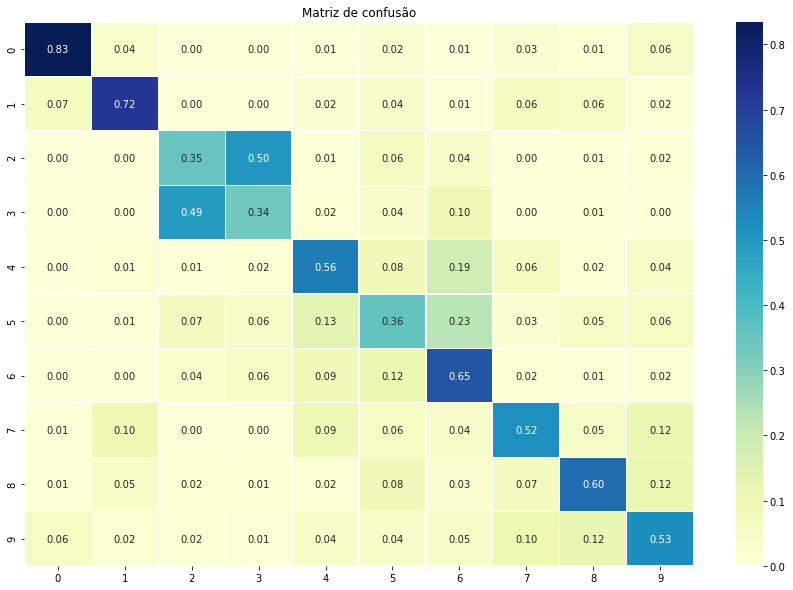

In [23]:
import sklearn.metrics as metrics
plt.figure(figsize = (15,10))
plt.title('Matriz de confusão')
matrix = metrics.confusion_matrix(resultado.real, resultado.pred, normalize='true')
sn.heatmap(matrix, annot=True, fmt=".2f",cmap="YlGnBu", linewidths=.1)

# Analise da Matriz de confusão:
- A partir da matriz de confusão, podemos que notar que o modelo confunde a variável 2 e 3. Logo, o que pode acontecer é que o modelo quando vai classificar o 2, ele classifica como 3 e vice-versa. O que torna um problema na hora da classificação.  

----
# **Segundo Modelo:** Decision Tree
<img src="imagens/decision_tree.png" alt="inicio"
	title="tela" width="1400" height="700" />

- Uma árvore de decisão (Decision Tree) é uma estrutura semelhante a um fluxograma em que cada nó interno representa um "teste" em um atributo (por exemplo, se um cara ou coroa dá cara ou coroa), cada ramo representa o resultado do teste, e cada nó folha representa um rótulo de classe (decisão tomada após calcular todos os atributos). Os caminhos da raiz à folha representam as regras de classificação.

-

<img src="imagens/treeex.png" alt="inicio"
	title="tela" width="1200" height="700" />


As árvores de decisão classificam os exemplos classificando-os na árvore da raiz até algum nó folha / terminal, com o nó folha / terminal fornecendo a classificação do exemplo.

Cada nó na árvore atua como um caso de teste para algum atributo, e cada aresta descendente do nó corresponde às respostas possíveis para o caso de teste. Esse processo é recursivo por natureza e é repetido para cada subárvore com raiz no novo nó.


## **Medidas de seleção de atributos**
 
Se o conjunto de dados consistir em  N  atributos, então decidir qual atributo colocar na raiz ou em diferentes níveis da árvore como nós internos é uma etapa complicada. Selecionar aleatoriamente qualquer nó para ser a raiz não pode resolver o problema. Se seguirmos uma abordagem aleatória, isso pode nos dar resultados ruins com baixa precisão.

Para resolver esse problema de seleção de atributos, os pesquisadores trabalharam e criaram algumas soluções. Eles sugeriram o uso de alguns  critérios  como:

- Entropia
- ganho de informação
- índice de Gini
- razão de ganho
- redução na variância
- qui-quadrado

Esses critérios calcularão os valores para cada atributo. Os valores são classificados e os atributos são colocados na árvore seguindo a ordem, ou seja, o atributo com um valor alto (no caso de ganho de informação) é colocado na raiz.
Ao usar o ganho de informação como critério, assumimos que os atributos são categóricos e, para o índice de Gini, os atributos são considerados contínuos.


## **Entropia** (Metodo que ultilizamos)
 
Entropia é uma medida da aleatoriedade nas informações que estão sendo processadas. Quanto maior a entropia, mais difícil é tirar qualquer conclusão dessa informação. Jogar uma moeda é um exemplo de ação que fornece informações aleatórias.

<img src="imagens/entro.png" alt="inicio"
	title="tela" width="600" height="500" />

A partir do gráfico acima, é bastante evidente que a entropia H (X) é zero quando a probabilidade é 0 ou 1. A entropia é máxima quando a probabilidade é 0,5 porque projeta aleatoriedade perfeita nos dados e não há chance se determinar perfeitamente o resultado.

A entropia matemática para 1 atributo é representada como:

<img src="imagens/calculo.png" alt="inicio"
	title="tela" width="600" height="500" />


 - Onde  S → Estado atual e Pi → Probabilidade de um evento  i  do estado S ou Porcentagem da classe  i  em um nó do estado S.

A entropia matematicamente para vários atributos é representada como:

<img src="imagens/calculo2.png" alt="inicio"
	title="tela" width="600" height="500" />

onde  T → Estado atual e X → atributo selecionado
_________


In [24]:
from sklearn.tree import DecisionTreeClassifier


In [25]:
tree= DecisionTreeClassifier(max_depth=8, criterion="entropy", splitter="best", random_state = 0).fit(train_features,train_labels)

score_train_tree = tree.score(train_features, train_labels)
score_test_tree = tree.score(test_features, test_labels)

print(f" Score train dataset : {score_train_tree*100:.2f} %\n Score test dataset: {score_test_tree*100:.2f} %")

 Score train dataset : 33.03 %
 Score test dataset: 30.44 %


## Vamos mudar os valores do Max_depht para ver o quanto muda a acuracia do modelo

In [26]:
tree= DecisionTreeClassifier(max_depth=5, criterion="entropy", splitter="best", random_state = 0).fit(train_features,train_labels)

score_train_tree = tree.score(train_features, train_labels)
score_test_tree = tree.score(test_features, test_labels)

print(f" Score train dataset : {score_train_tree*100:.2f} %\n Score test dataset: {score_test_tree*100:.2f} %")

 Score train dataset : 17.48 %
 Score test dataset: 17.74 %


In [27]:
tree= DecisionTreeClassifier(max_depth=12, criterion="entropy", splitter="best", random_state = 0).fit(train_features,train_labels)

score_train_tree = tree.score(train_features, train_labels)
score_test_tree = tree.score(test_features, test_labels)

print(f" Score train dataset : {score_train_tree*100:.2f} %\n Score test dataset: {score_test_tree*100:.2f} %")

 Score train dataset : 58.84 %
 Score test dataset: 41.72 %


**Como Podemos ver a acuracia do modelo varia bastante com o Max_depht sendo que se o valor é menor ele tem uma acuracia menor e se ele maior a acuracia aumenta tambem, mas aumentar bastante torna o modelo complexo, ou seja fica mais profundo, pois vai ter varios nodulos de arvores.**
## Com isso decidimos manter um valor intermediario para esse parametro

In [28]:

# Cria árvore de decisão
arvore_decisao = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=8 ,random_state=0)
# Treina o modelo
Decision_model = arvore_decisao.fit(train_features, train_labels)
arvore_decisao_pred = Decision_model.predict(test_features)
acuracia_dt= metrics.accuracy_score(test_labels,arvore_decisao_pred)*100
print(f'Precisão do modelo (Decision Tree): {np.mean(acuracia_dt):.2f} %')#acuracia média do modelo

Precisão do modelo (Decision Tree): 30.44 %


_______________
# **Terceiro Modelo:** KNN Classification

KNN é um algoritmo de aprendizagem não paramétrico e preguiçoso. Não paramétrico significa que não há suposição para a distribuição de dados subjacente. Em outras palavras, a estrutura do modelo determinada a partir do conjunto de dados. Isso será muito útil na prática, onde a maioria dos conjuntos de dados do mundo real não segue suposições teóricas matemáticas. O algoritmo lento significa que não precisa de nenhum ponto de dados de treinamento para a geração do modelo. Todos os dados de treinamento usados ​​na fase de teste. Isso torna o treinamento mais rápido e a fase de teste mais lenta e cara. Fase de teste dispendiosa significa tempo e memória. Na pior das hipóteses, o KNN precisa de mais tempo para verificar todos os pontos de dados e a verificação de todos os pontos de dados exigirá mais memória para armazenar os dados de treinamento.


## Como funciona o algoritmo KNN?
Em KNN, K é o número de vizinhos mais próximos. O número de vizinhos é o principal fator decisivo. K é geralmente um número ímpar se o número de classes for 2. Quando K = 1, o algoritmo é conhecido como o algoritmo do vizinho mais próximo. Este é o caso mais simples. Suponha que P1 seja o ponto para o qual o rótulo precisa prever. Primeiro, você encontra o ponto mais próximo de P1 e, em seguida, o rótulo do ponto mais próximo atribuído a P1.

<img src="imagens/knn.png" alt="inicio"
	title="tela" width="600" height="500" />


Suponha que P1 seja o ponto para o qual o rótulo precisa prever. Primeiro, você encontra o ponto k mais próximo de P1 e, a seguir, classifica os pontos pela maioria dos votos de seus k vizinhos. Cada objeto vota em sua classe e a classe com mais votos é considerada a previsão. Para encontrar os pontos semelhantes mais próximos, você encontra a distância entre os pontos usando medidas de distância como distância euclidiana, distância de Hamming, distância de Manhattan e distância de Minkowski. KNN tem as seguintes etapas básicas:

 - Calcular distância
 - Encontre os vizinhos mais próximos
 - Votar em rótulos


<img src="imagens/knn2.png" alt="inicio"
	title="tela" width="600" height="500" />


## Como você decide o número de vizinhos em KNN?
Agora, você entende o mecanismo de funcionamento do algoritmo KNN. Nesse ponto, surge a pergunta: Como escolher o número ótimo de vizinhos? E quais são seus efeitos no classificador? O número de vizinhos (K) em KNN é um hiperparâmetro que você precisa escolher no momento da construção do modelo. Você pode pensar em K como uma variável de controle para o modelo de previsão.

A pesquisa mostrou que nenhum número ótimo de vizinhos se adequa a todos os tipos de conjuntos de dados. Cada conjunto de dados tem seus próprios requisitos. No caso de um pequeno número de vizinhos, o ruído terá uma influência maior no resultado, e um grande número de vizinhos o torna computacionalmente caro. A pesquisa também mostrou que uma pequena quantidade de vizinhos tem ajuste mais flexível, o que terá baixa tendência, mas alta variância, e um grande número de vizinhos terá um limite de decisão mais suave, o que significa menor variação, mas maior tendência.

Geralmente, os cientistas de dados escolhem um número ímpar se o número de classes for par. Você também pode verificar gerando o modelo em diferentes valores de k e verificar seu desempenho. Você também pode tentar o método do cotovelo aqui.

<img src="imagens/knn3.png" alt="inicio"
	title="tela" width="600" height="500" />

______________

In [29]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Cria o  KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
#Treina o modelo com os dados de treino
knn.fit(train_features, train_labels)

#faz o predict do modelo com os dados de teste
y_pred = knn.predict(test_features)

In [30]:
knn= KNeighborsClassifier().fit(train_features,train_labels)

score_train = knn.score(train_features, train_labels)
score_test = knn.score(test_features, test_labels)

print(f" Score train dataset : {score_train*100:.2f} %\n Score test dataset: {score_test*100:.2f} %")

 Score train dataset : 11.49 %
 Score test dataset: 3.88 %


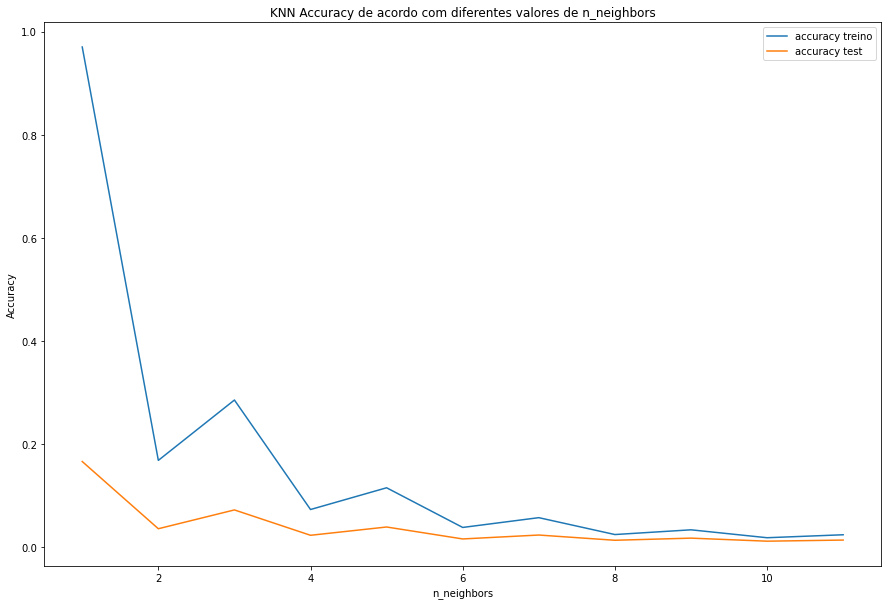

In [31]:
plt.figure(figsize=(15,10))
intervalo = np.arange(1,12,1)
accuracy_treino = []
accuracy_test = []

for n in intervalo:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(train_features , train_labels)
    accuracy_treino.append(knn.score(train_features , train_labels))
    accuracy_test.append(knn.score(test_features ,test_labels))
plt.plot(intervalo, accuracy_treino , label = 'accuracy treino')
plt.plot(intervalo, accuracy_test , label = 'accuracy test')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.title("KNN Accuracy de acordo com diferentes valores de n_neighbors")
plt.legend()
plt.show()

In [32]:
print("Accuracy: {:.2f} %".format(metrics.accuracy_score(test_labels, y_pred)*100))

Accuracy: 7.19 %


## Validação Cruzada 
Validação Cruzada(cross validation – CV) é talvez a técnica mais utilizada para selecionar os melhores modelos de um conjunto de modelos ou ainda para “tunar” os hiperparâmetros de um modelo já escolhido. Essa popularidade se deve principalmente ao fato de resolver o problema da variância do conjunto de validação, produzindo uma avaliação mais robusta do modelo.

Ao executar a validação cruzada é produzido um conjunto de medidas de performance que podem ser sumarizadas em uma só, sendo esse valor final uma medida de performance mais robusta do que simplesmente avaliar o modelo uma única vez. Esse processo resulta em uma diminuição do viés que pode haver em um único conjunto de validação e nos aproxima de obtermos o modelo que generalizará bem para dados nunca vistos.


<img src="imagens/cross.png" alt="inicio"
	title="tela" width="600" height="500" />




Validação Cruzada de um único modelo com k=5
Com CV temos k medidas de performance, uma para cada conjunto de validação, podemos sumarizar essas medidas em uma única medida, por exemplo calculando a média dos erros. Agora além de termos uma média de performance mais robusta para um modelo temos também algo que não se consegue com a abordagem hold-out, podemos calcular o desvio padrão do erro do modelo no conjunto de validação.

Analisar a variância do erro de validação de um modelo pode ser útil em situações em que nossa prioridade não é ter um modelo que possui altíssima acurácia em algumas instâncias específicas e que pode errar feio em outras, mas sim um modelo que possui uma acurácia razoável que se mantém na maior parte das instâncias, ou seja, menor variância. Se você já estudou a questão especificidade x sensibilidade pode imaginar situações onde um modelo assim seria preferível.

## Comparando Modelos
Até agora buscamos produzir uma medida de erro mais robusta para um único modelo, porém é comum utilizar a validação cruzada para selecionar um dentre diversos modelos. A única pequena adaptação é que ao invés de executar a validação cruzada uma única vez, executamos uma CV para cada modelo e comparamos seus erros médios, eventualmente escolhendo o melhor deles como modelo final.

<img src="imagens/cross2.png" alt="inicio"
	title="tela" width="600" height="500" />


**Validação Cruzada para comparar Múltiplos Modelos**
Perceba que o conjunto reservado para teste foi usado uma única vez no final do algorítmo após selecionarmos o melhor modelo. É importante ajustar os hiperparâmetros de um modelo(ou comparar dois modelos diferentes) somente com base na performance de validação e nunca com base no conjunto de teste, pois assim estaríamos contaminando o modelo com a informação de teste, tendo por final uma medida de generalização muito mais otimista que a real capacidade do modelo escolhido. Esse é um erro comum de vazamento de dados (Data Leakage) que ocorre com iniciantes na área.


In [35]:
print('Valores de acurácia dos modelos: \n' )
print('Decision Tree: {:.2f} %'.format(acuracia_dt))
print('KNN: {:.2f} %'.format(metrics.accuracy_score(test_labels, y_pred)*100))
print('Random Forest: {:.2f} %'.format(acuracia_rf*100))


Valores de acurácia dos modelos: 

Decision Tree: 30.44 %
KNN: 7.19 %
Random Forest: 54.87 %


Podemos ver que a acurácia do modelo "Random Forest" é o maior valor, porém não podemos nos prender somente na visualização somente nos valores das acurácias, logo podemos fazer uma validação cruzada para comparar os modelos e ter resultados mais coerentes.

In [34]:
models = [DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestRegressor()]
models_scores = []
for model in models:
    val_scores = cross_val_score(model, train_features, train_labels, cv=5)
    model_name = model.__class__.__name__
    print('Modelo {}| Média: {:.2} | Desvio: {:.2}'.format(model_name,np.mean(val_scores), np.std(val_scores)))

Modelo DecisionTreeClassifier| Média: 0.43 | Desvio: 0.0054
Modelo KNeighborsClassifier| Média: 0.036 | Desvio: 0.0015
Modelo RandomForestRegressor| Média: 0.35 | Desvio: 0.0069


## Análise da validação Cruzuda
- Como podemos notar o decision tree e o Random Forest são melhores que o KNN, pois são mais precisos assim como é possivel notar que as medias entre eles varia pouco e o desvio padrão varia bem pouco entre os 3 modelos de classificação.

## Conclusão

- Com o decorrer do Projeto 2, concluímos que a base de dados escolhida para a analise não foi de fato muito boa para que conseguissemos obter os melhores resultados. Percebemos que os dados estavam enviesado como denominado em Machine Learning está em 'Outlier', dessa forma a maioria dos nossos dados estão fora da curva e dificultou que nossas porcentagens na hora de prever fosse um pouco baixa.
- De todas as técnicas utilizadas, o modelo "Decision Tree" apresentou a melhor média de acurácia, de acordo com a validação cruzada, e o "KNN" apresentou a média mais baixa.
- Em relação a nossa pergunta realizada no início do Projeto, mesmo com as dificuldades presentes em nosso banco de dados conseguimos prever a maioria dos gêneros musicais que foram proposto, talvez não com as porcentagens de desejamos ao inicio do nosso projeto.
 

 


_____________
## Referência Bibliográfica 
- https://operdata.com.br/blog/como-interpretar-um-boxplot/
- https://builtin.com/data-science/random-forest-algorithm
- https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html
- https://dataml.com.br/validacao-cruzada-aninhada-com-scikit-learn/
- https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=14989519638&utm_adgroupid=127836677279&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377095&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1001773&gclid=Cj0KCQiAkZKNBhDiARIsAPsk0WjAPPB8ToYWC7Wuq3SGZiUYZPaXa6aH-JVpIuDE26DQiH0mfuo8xSwaAu7DEALw_wcB
